In [199]:
import pandas as pd
import numpy as np
from ProjectUtils import LassoClass
from ProjectUtils import RidgeClass

## Import housing data and create df

In [200]:
df = pd.read_csv("House3.csv", names=["Y","X1","X2","X3","X4","X5"])[1:]
df = df.astype(float)

In [201]:
df.head()

,Y,X1,X2,X3,X4,X5
1,550000.0,53.316730,-6.295232,3.0,2.0,108.0
2,550000.0,53.381435,-6.246925,3.0,2.0,175.0
3,250000.0,53.376805,-6.268684,2.0,1.0,52.0
4,345000.0,52.204043,0.104260,3.0,3.0,110.0
5,325000.0,53.333422,-6.291426,2.0,1.0,73.0


In [202]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [203]:
df_norm = normalize(df).reset_index()

In [204]:
df_norm

,index,Y,X1,X2,X3,X4,X5
0,1,0.062944,0.972318,0.392971,0.058824,0.043478,0.065443
1,2,0.062944,0.972968,0.393135,0.058824,0.043478,0.106422
2,3,0.020986,0.972922,0.393061,0.029412,0.000000,0.031193
3,4,0.034272,0.961147,0.414681,0.058824,0.086957,0.066667
4,5,0.031475,0.972486,0.392984,0.029412,0.000000,0.044037
...,...,...,...,...,...,...,...
1461,1462,0.020986,0.973046,0.392965,0.029412,0.043478,0.053211
1462,1463,0.020979,0.972307,0.392946,0.029412,0.000000,0.067278
1463,1464,0.045461,0.973013,0.392570,0.088235,0.086957,0.084404
1464,1465,0.405599,0.972444,0.393188,0.088235,0.130435,0.159021


In [205]:
X_raw = np.column_stack((df_norm.X1,df_norm.X2,df_norm.X3,df_norm.X4,df_norm.X5))
y = df_norm.Y

In [206]:
X_raw

array([[0.97231846, 0.39297093, 0.05882353, 0.04347826, 0.06544343],
       [0.97296807, 0.39313482, 0.05882353, 0.04347826, 0.10642202],
       [0.97292159, 0.393061  , 0.02941176, 0.        , 0.03119266],
       ...,
       [0.97301344, 0.39256979, 0.08823529, 0.08695652, 0.08440367],
       [0.9724436 , 0.39318772, 0.08823529, 0.13043478, 0.15902141],
       [0.97244968, 0.39304067, 0.05882353, 0.04347826, 0.07278287]])

## Create testing and training sets

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2)

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
LinRegModel = LinearRegression().fit(X_train,y_train)

In [210]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

## Linear Regression Kfold check for MSE

In [211]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
acc_test = []
mean_error_train = []
std_error_train = []
acc_train = []

In [212]:
for i in range(5):
    temp_test = []
    temp_train = []
    temp_acc_test = []
    temp_acc_train = []
    for train,test in kf.split(X_raw):
        LinRegModel.fit(X_raw[train],y[train])
        ypred = LinRegModel.predict(X_raw[test])
        ypred_train = LinRegModel.predict(X_raw[train])
        temp_test.append(mean_squared_error(y[test],ypred))
        temp_train.append(mean_squared_error(y[train],ypred_train))
        # temp_acc_test.append(accuracy_score(ypred,y[test]))
        # temp_acc_train.append(accuracy_score(ypred_train,y[train]))
    mean_error.append(np.array(temp_test).mean())
    std_error.append(np.array(temp_test).std())
    # acc_test.append(np.array(temp_acc_test).mean())
    mean_error_train.append(np.array(temp_train).mean())
    std_error_train.append(np.array(temp_train).mean())
    # acc_train.append(np.array(temp_acc_train).mean())

In [213]:
import matplotlib.pyplot as plt

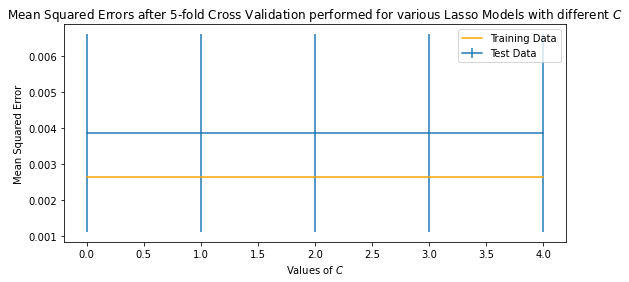

In [214]:
fig = plt.figure(figsize=(9,4))
plt.errorbar(range(5),mean_error, yerr=std_error, label="Test Data")
plt.plot(range(5), mean_error_train, label="Training Data", c="orange")
plt.xlabel("Values of $C$")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Lasso Models with different $C$")
plt.legend()
plt.show()
fig.savefig("q2ci.png", bbox_inches="tight")

## Kfold Check for C in Lasso Models 

In [231]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
mean_error_train = []
std_error_train = []
C_list = np.linspace(0.001,1000,80)

In [232]:
for currC in C_list:
    currModel = LassoClass(currC)
    temp_test = []
    temp_train = []
    for train,test in kf.split(X_raw):
        currModel.model.fit(X_raw[train],y[train])
        ypred = currModel.model.predict(X_raw[test])
        ypred_train = currModel.model.predict(X_raw[train])
        temp_test.append(mean_squared_error(y[test],ypred))
        temp_train.append(mean_squared_error(y[train],ypred_train))
    mean_error.append(np.array(temp_test).mean())
    std_error.append(np.array(temp_test).std())
    mean_error_train.append(np.array(temp_train).mean())
    std_error_train.append(np.array(temp_train).mean())

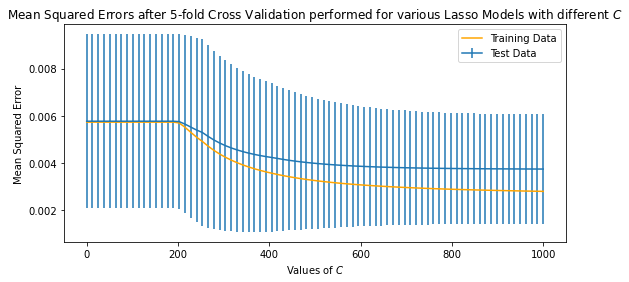

In [233]:
fig = plt.figure(figsize=(9,4))
plt.errorbar(C_list,mean_error, yerr=std_error, label="Test Data")
plt.plot(C_list,mean_error_train, label="Training Data", c="orange")
plt.xlabel("Values of $C$")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Lasso Models with different $C$")
plt.legend()
plt.show()
fig.savefig("q2ci.png", bbox_inches="tight")


## Kfold for C in Ridge Models

In [250]:
kf = KFold(n_splits=5)
mean_error=[]
std_error=[]
mean_error_train = []
std_error_train = []
C_list = np.linspace(0.1,2,20)

In [251]:
for currC in C_list:
    currModel = RidgeClass(currC)
    temp_test = []
    temp_train = []
    for train,test in kf.split(X_raw):
        currModel.model.fit(X_raw[train],y[train])
        ypred = currModel.model.predict(X_raw[test])
        ypred_train = currModel.model.predict(X_raw[train])
        temp_test.append(mean_squared_error(y[test],ypred))
        temp_train.append(mean_squared_error(y[train],ypred_train))
    mean_error.append(np.array(temp_test).mean())
    std_error.append(np.array(temp_test).std())
    mean_error_train.append(np.array(temp_train).mean())
    std_error_train.append(np.array(temp_train).mean())

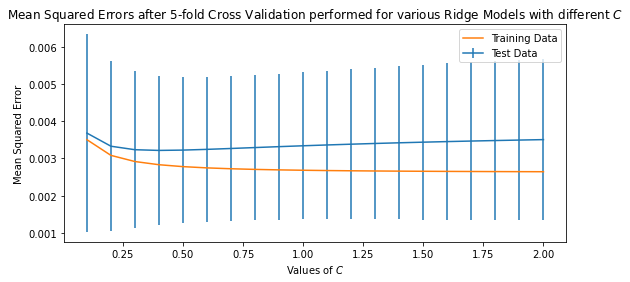

In [252]:
fig = plt.figure(figsize=(9,4))
plt.errorbar(C_list,mean_error, yerr=std_error, label="Test Data")
plt.plot(C_list,mean_error_train, label="Training Data")
plt.xlabel("Values of $C$")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Errors after 5-fold Cross Validation performed for various Ridge Models with different $C$")
plt.legend()
plt.show()
fig.savefig("q2a.png", bbox_inches="tight")